### Voting Classification

In [2]:
import numpy as np
import warnings
from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


In [3]:
# Load the iris dataset from sklearn datasets
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target


In [4]:
# Create three different classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

# Print a header for the cross-validation results
print('5-fold cross validation:\n')

# Create a list of labels for the classifiers
labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

# Loop through the classifiers and perform 5-fold cross-validation for each
for clf, label in zip([clf1, clf2, clf3], labels):

	# Use cross_val_score to compute accuracy scores using 5-fold cross-validation
	scores = model_selection.cross_val_score(clf, X, y, 
											cv=5, 
											scoring='accuracy')
	
	# Print the mean accuracy and standard deviation of accuracy for the current classifier
	print("Accuracy: %0.2f (+/- %0.2f) [%s]"
		% (scores.mean(), scores.std(), label))


5-fold cross validation:

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [Naive Bayes]


In [5]:
# Create a Hard Voting Classifier
voting_clf_hard = VotingClassifier(
	estimators=[
		(labels[0], clf1), # Include the first classifier (Logistic Regression)
		(labels[1], clf2), # Include the second classifier (Random Forest)
		(labels[2], clf3), # Include the third classifier (Naive Bayes)
	],
	voting='hard' # Specify hard voting, where the majority class prediction is chosen
)


In [6]:
# Create a Soft Voting Classifier
voting_clf_soft = VotingClassifier(
	estimators=[
		(labels[0], clf1), # Include the first classifier (Logistic Regression)
		(labels[1], clf2), # Include the second classifier (Random Forest)
		(labels[2], clf3), # Include the third classifier (Naive Bayes)
	],
	voting='soft' # Specify soft voting, where class probabilities are combined
)


In [7]:
# Create a new list of labels that includes Voting Classifiers
labels_new = ['Logistic Regression', 'Random Forest', 'Naive Bayes',
			'Voting_Classifier_Hard', 'Voting_Classifier_Soft']

# Loop through the classifiers and perform 5-fold cross-validation for each
for clf, label in zip([clf1, clf2, clf3, voting_clf_hard, voting_clf_soft], labels_new):

	# Use cross_val_score to compute accuracy scores using 5-fold cross-validation
	scores = model_selection.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
	
	# Print the mean accuracy and standard deviation of accuracy for the current classifier
	print("Accuracy: %0.2f (+/- %0.2f) [%s]"
		% (scores.mean(), scores.std(), label))


Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [Naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Voting_Classifier_Hard]
Accuracy: 0.95 (+/- 0.03) [Voting_Classifier_Soft]


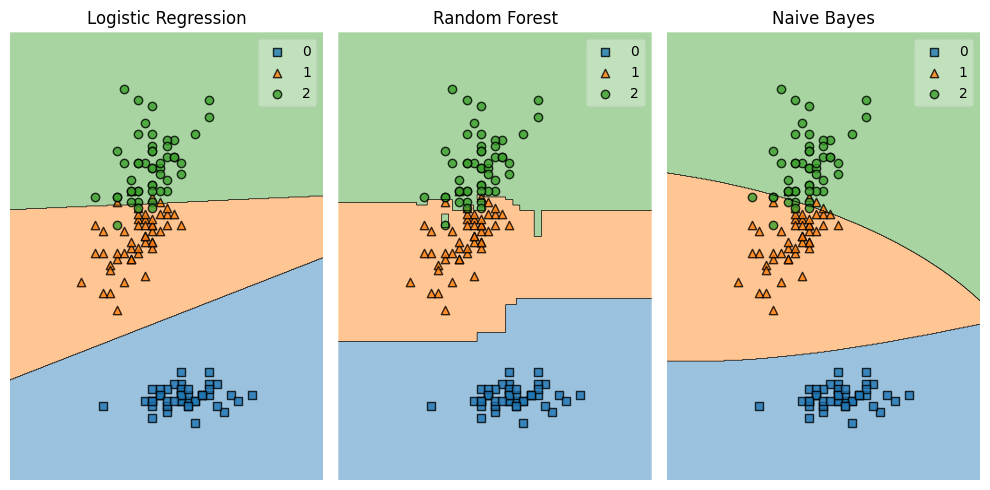

In [8]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()


clf1.fit(X,y)
clf2.fit(X,y)
clf3.fit(X,y)

classifiers = [clf1, clf2, clf3]
titles = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip(classifiers, titles, axes.flatten()):
	plot_decision_regions(X, y, clf=clf, ax=ax)
	ax.set_title(title)
	ax.set_axis_off()
	
plt.tight_layout()
plt.savefig('3 classifiers.png')
plt.show()


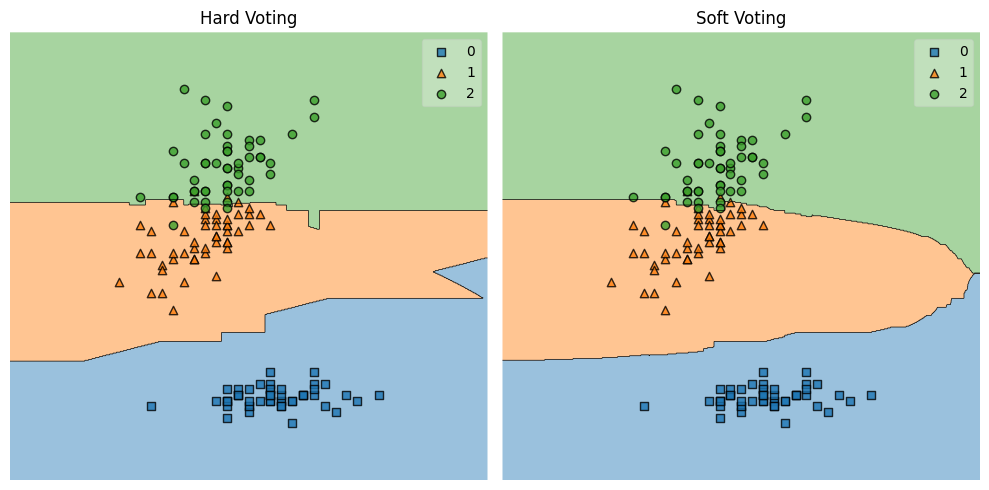

In [9]:
voting_clf_hard.fit(X,y)
voting_clf_soft.fit(X,y)


classifiers = [voting_clf_hard, voting_clf_soft]
titles = ['Hard Voting','Soft Voting']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip(classifiers, titles, axes.flatten()):
	plot_decision_regions(X, y, clf=clf, ax=ax)
	ax.set_title(title)
	ax.set_axis_off()

plt.tight_layout()
plt.savefig('voting.png')
plt.show()


### Voting Regression

In [12]:
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv("./Datasets/HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [14]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [23]:
# Fill NaN with 0 in numeric columns only
numeric_columns = X.select_dtypes(include=['number']).columns
X.fillna(X[numeric_columns].mean(), inplace=True)

In [24]:
X.shape

(506, 13)

In [25]:
y.shape

(506,)

In [26]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [31]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()

In [32]:
estimators = [('lr',lr),('dt',dt),('svr',svr)]

In [33]:
for estimator in estimators:
  scores = cross_val_score(estimator[1],X,y,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))

lr 0.19
dt -0.32
svr -0.42


In [34]:
from sklearn.ensemble import VotingRegressor

In [35]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.44


In [36]:
for i in range(1,4):
  for j in range(1,4):
    for k in range(1,4):
      vr = VotingRegressor(estimators,weights=[i,j,k])
      scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
      print("For i={},j={},k={}".format(i,j,k),np.round(np.mean(scores),2))


For i=1,j=1,k=1 0.41
For i=1,j=1,k=2 0.35
For i=1,j=1,k=3 0.25
For i=1,j=2,k=1 0.39
For i=1,j=2,k=2 0.38
For i=1,j=2,k=3 0.33
For i=1,j=3,k=1 0.33
For i=1,j=3,k=2 0.38
For i=1,j=3,k=3 0.38
For i=2,j=1,k=1 0.42
For i=2,j=1,k=2 0.41
For i=2,j=1,k=3 0.33
For i=2,j=2,k=1 0.4
For i=2,j=2,k=2 0.43
For i=2,j=2,k=3 0.36
For i=2,j=3,k=1 0.41
For i=2,j=3,k=2 0.36
For i=2,j=3,k=3 0.41
For i=3,j=1,k=1 0.41
For i=3,j=1,k=2 0.41
For i=3,j=1,k=3 0.38
For i=3,j=2,k=1 0.39
For i=3,j=2,k=2 0.44
For i=3,j=2,k=3 0.43
For i=3,j=3,k=1 0.38
For i=3,j=3,k=2 0.45
For i=3,j=3,k=3 0.41


In [37]:
# using the same algorithm

dt1 = DecisionTreeRegressor(max_depth=1)
dt2 = DecisionTreeRegressor(max_depth=3)
dt3 = DecisionTreeRegressor(max_depth=5)
dt4 = DecisionTreeRegressor(max_depth=7)
dt5 = DecisionTreeRegressor(max_depth=None)

In [38]:
estimators = [('dt1',dt1),('dt2',dt2),('dt3',dt3),('dt4',dt4),('dt5',dt5)]

In [39]:
for estimator in estimators:
  scores = cross_val_score(estimator[1],X,y,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))

dt1 -0.51
dt2 0.02
dt3 0.05
dt4 0.15
dt5 -0.17


In [40]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.3
